-----------------------------------------------------------
Количество информации в файле ./me.txt: 83.28703748714784


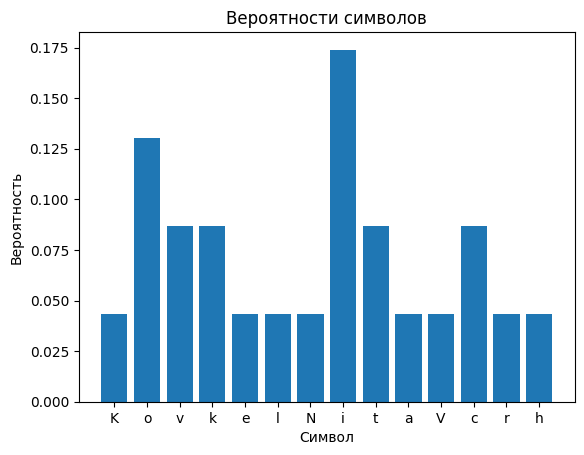

Количество информации в файле ./me.txt с учетом ошибок (p=0.1): 72.50013883459438
Количество информации в файле ./me.txt с учетом ошибок (p=0.5): 60.28703748714785
Количество информации в файле ./me.txt с учетом ошибок (p=1.0): 0
-----------------------------------------------------------
Количество информации в файле ./meascii.txt: 182.99511742360204


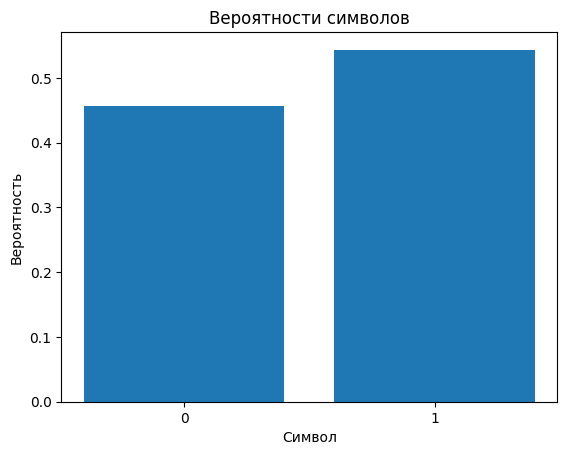

Количество информации в файле ./meascii.txt с учетом ошибок (p=0.1): 97.70481077957226
Количество информации в файле ./meascii.txt с учетом ошибок (p=0.5): 0.0
Количество информации в файле ./meascii.txt с учетом ошибок (p=1.0): 184
-----------------------------------------------------------
Количество информации в файле ./eng.txt: 4969.346511438053


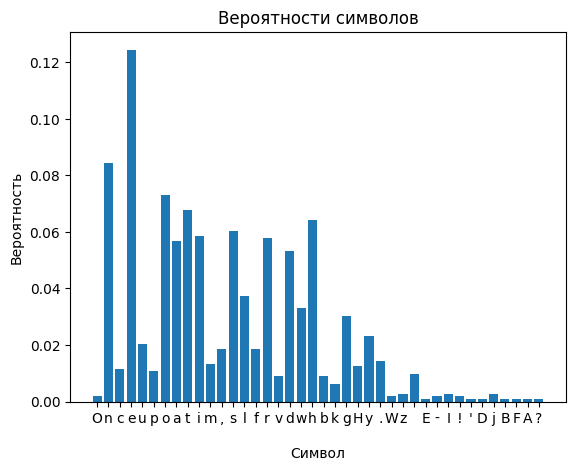

Количество информации в файле ./eng.txt с учетом ошибок (p=0.1): 4442.1954642437
Количество информации в файле ./eng.txt с учетом ошибок (p=0.5): 3845.346511438053
Количество информации в файле ./eng.txt с учетом ошибок (p=1.0): 0
-----------------------------------------------------------
Количество информации в файле ./ru.txt: 5397.628620453056


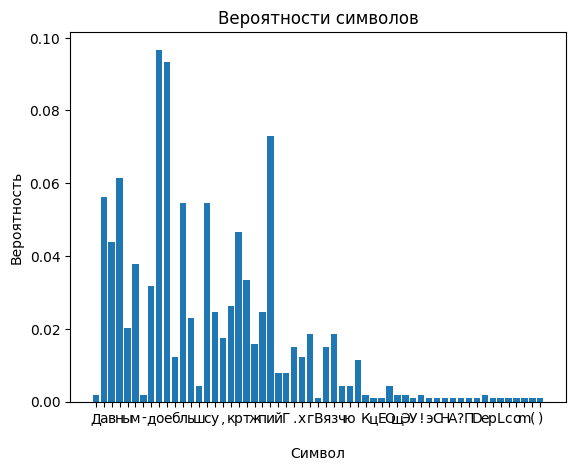

Количество информации в файле ./ru.txt с учетом ошибок (p=0.1): 4864.380630542043
Количество информации в файле ./ru.txt с учетом ошибок (p=0.5): 4260.628620453056
Количество информации в файле ./ru.txt с учетом ошибок (p=1.0): 0
-----------------------------------------------------------
Количество информации в файле ./bin.txt: 10903.98498083701


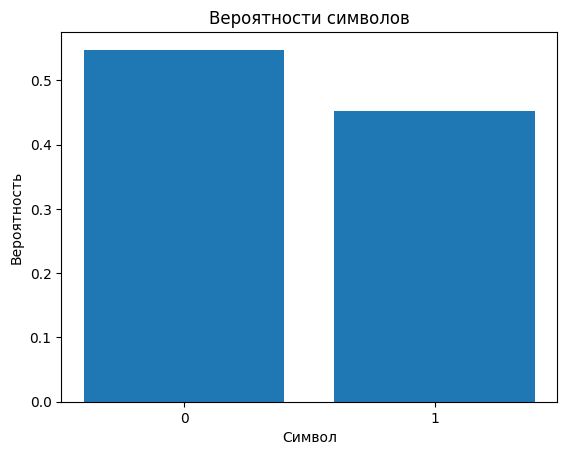

Количество информации в файле ./bin.txt с учетом ошибок (p=0.1): 5828.304364764049
Количество информации в файле ./bin.txt с учетом ошибок (p=0.5): 0.0
Количество информации в файле ./bin.txt с учетом ошибок (p=1.0): 10976


In [4]:
import collections
import math
import matplotlib.pyplot as plt

class FileEntropy:
    def __init__(self, file_name):
        self.file_name = file_name
        self.text = self._read_file()
        self.is_binary = self._check_if_binary()
        self.histogram = None

    def _read_file(self):
        try:
            with open(self.file_name, 'r') as f:
                text = f.read()
                return text.replace(' ', '')
        except FileNotFoundError:
            return None

    def _check_if_binary(self):
        if self.text is None:
            return False
        return all(c in '01\n' for c in self.text)

    def calculate_entropy(self):
        symbol_counts = collections.Counter(self.text)
        total_symbols = len(self.text)
        probabilities = {symbol: count / total_symbols for symbol, count in symbol_counts.items()}
        self.histogram = probabilities
        entropy = -sum(p * math.log2(p) for p in probabilities.values())
        return entropy

    def draw_histogram(self):
        if self.histogram:
            plt.bar(self.histogram.keys(), self.histogram.values())
            plt.xlabel("Символ")
            plt.ylabel("Вероятность")
            plt.title("Вероятности символов")
            plt.show()

    def info_amount(self):
        if self.text:
            return self.calculate_entropy() * len(self.text)
        else:
            return None

    def effective_entropy(self, p):
        q = 1 - p
        if self.is_binary and (p == 0 or q == 0):
            return 1
        elif not self.is_binary:
            if p == 1:
                return 0
            else:
                return self.calculate_entropy() - (- p * math.log2(p) - q * math.log2(q))
        return 1 - (- p * math.log2(p) - q * math.log2(q))

    def info_amount_with_errors(self, p):
        if self.text:
            return self.effective_entropy(p) * len(self.text)
        else:
            return None


files = ['./me.txt', './meascii.txt', './eng.txt', './ru.txt', './bin.txt']
error_probabilities = [0.1, 0.5, 1.0]

for file in files:
    entropy_file = FileEntropy(file)
    print("-----------------------------------------------------------")
    print(f"Количество информации в файле {file}: {entropy_file.info_amount()}")
    entropy_file.draw_histogram()
    for error_probability in error_probabilities:
        print(f"Количество информации в файле {file} с учетом ошибок (p={error_probability}): {entropy_file.info_amount_with_errors(error_probability)}")
